In [1]:
#Coded by Ferdin Joe John Joseph
#DSW Notebook Service in Alibaba Cloud with GPU instance used
# vanilla lstm example
from numpy import array
import tensorflow as tf
from tensorflow import keras

In [2]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [19,14,18,19,20,18,19,28,15,33,49,30,22]
#,37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [3]:
# define model
model = keras.Sequential()

model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.LSTM(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [4]:
#Compile model
model.compile(optimizer='adam', loss='mse')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [6]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
buckets1 = []
for i in range(0,100):
    buckets1.append(0)
raw_seq = [19,14,18,19,20,18,19,28,15,33,49]
fut=[37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
for i in range(len(fut)):
	# choose a number of time steps
	n_steps = 10
	# split into samples
	raw_seq.append(fut[i])
	X, y = split_sequence(raw_seq, n_steps)
	# reshape from [samples, timesteps] into [samples, timesteps, features]
	n_features = 1
	X = X.reshape((X.shape[0], X.shape[1], n_features))
	# fit model
	model.fit(X, y, epochs=200, verbose=0)
	# demonstrate prediction
	N=10
	x_input = array(raw_seq[-N:])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	buckets1[i]=yhat
	print(yhat)
print(buckets1)

[[47.634212]]
[[49.01488]]
[[36.448]]
[[19.058517]]
[[58.798923]]
[[16.346485]]
[[7.57274]]
[[19.445087]]
[[11.3376875]]
[[12.592271]]
[[21.751318]]
[[13.152127]]
[[9.026712]]
[[29.931042]]
[[16.187538]]
[[26.05039]]
[[12.002804]]
[[21.82973]]
[[7.245298]]
[[6.3475494]]
[[13.758312]]
[[9.167548]]
[[30.636715]]
[[4.3811154]]
[[4.5237765]]
[[15.288443]]
[[13.389739]]
[[10.594953]]
[[6.27293]]
[[15.483896]]
[[5.564394]]
[[2.9132404]]
[[5.7025743]]
[[10.460307]]
[[20.071398]]
[[5.390167]]
[[16.741446]]
[[20.080599]]
[[9.097268]]
[[3.5567315]]
[[0.35086766]]
[[0.6266335]]
[[1.5081877]]
[[4.349044]]
[[6.7738667]]
[[1.2253784]]
[[0.74856687]]
[[2.6884537]]
[[1.668727]]
[[-0.15153597]]
[[1.0363593]]
[[0.21580048]]
[[0.3090695]]
[[0.37862682]]
[[0.37520993]]
[[0.48549604]]
[[0.40223694]]
[[0.33709684]]
[[0.3026443]]
[[0.2675017]]
[[0.2596143]]
[[0.2545585]]
[[0.21944717]]
[[0.2618202]]
[[0.20311846]]
[[0.19073093]]
[[0.16846776]]
[[0.13952824]]
[[0.15488362]]
[[0.15099108]]
[[0.14772767]]
[[0.1

In [7]:
#Stacked LSTM
model = keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [9]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
buckets = []
for i in range(0,100):
    buckets.append(0)
raw_seq = [19,14,18,19,20,18,19,28,15,33,49]
fut=[37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
for i in range(len(fut)):
	# choose a number of time steps
	n_steps = 10
	# split into samples
	raw_seq.append(fut[i])
	X, y = split_sequence(raw_seq, n_steps)
	# reshape from [samples, timesteps] into [samples, timesteps, features]
	n_features = 1
	X = X.reshape((X.shape[0], X.shape[1], n_features))
	# fit model
	model.fit(X, y, epochs=200, verbose=0)
	# demonstrate prediction
	N=10
	x_input = array(raw_seq[-N:])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	buckets[i]=yhat
	print(yhat)
print(buckets)

[[43.4136]]
[[44.87456]]
[[28.858072]]
[[30.716772]]
[[71.92852]]
[[21.845575]]
[[27.85898]]
[[23.645056]]
[[32.403744]]
[[18.042753]]
[[13.109678]]
[[23.244158]]
[[10.264407]]
[[23.002253]]
[[14.644907]]
[[26.234182]]
[[16.96337]]
[[22.832527]]
[[11.339445]]
[[5.11951]]
[[7.0355306]]
[[6.63381]]
[[16.544146]]
[[2.9142957]]
[[10.079329]]
[[16.102997]]
[[19.610722]]
[[3.0633097]]
[[1.5110139]]
[[10.906853]]
[[11.798045]]
[[12.739842]]
[[8.924009]]
[[10.39221]]
[[18.95218]]
[[-1.187208]]
[[6.103807]]
[[21.616358]]
[[5.9254656]]
[[15.465433]]
[[18.160563]]
[[4.0464535]]
[[2.6254308]]
[[6.7473326]]
[[2.2892344]]
[[0.80581224]]
[[0.68908036]]
[[2.8911462]]
[[2.0656695]]
[[0.887601]]
[[1.4987001]]
[[-0.26277918]]
[[0.48643637]]
[[0.33940715]]
[[0.17012314]]
[[0.4896062]]
[[0.37968963]]
[[0.28583503]]
[[0.25867105]]
[[0.23773298]]
[[0.29480112]]
[[0.25393736]]
[[0.21964902]]
[[0.25195777]]
[[0.20850411]]
[[0.16225064]]
[[0.1453537]]
[[0.12593818]]
[[0.18695183]]
[[0.17283334]]
[[0.14324908]]


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


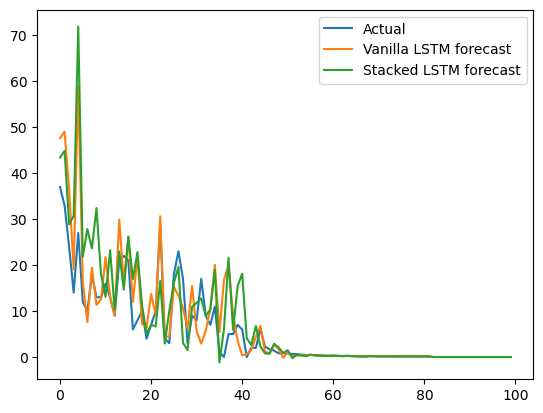

In [10]:
import matplotlib.pyplot as plt
actual=fut
vanilla=buckets1
stackedl=buckets
plt.plot(actual,label='Actual')
plt.plot(vanilla,label='Vanilla LSTM forecast')
plt.plot(stackedl,label='Stacked LSTM forecast')
plt.legend()
#display plot
plt.show()

In [11]:
#Stacked LSTM
model = keras.Sequential()
model.add(tf.keras.layers.LSTM(50, activation='elu', input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adamax', loss='mse')

In [12]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
buckets = []
for i in range(0,100):
    buckets.append(0)
raw_seq = [19,14,18,19,20,18,19,28,15,33,49]
fut=[37,33,24,14,27,12,10,18,13,13,16,13,9,21,22,21,6,8,10,4,7,10,29,4,3,18,23,17,3,9,8,17,9,7,11,1,0,5,5,7,6,0,2,2,6.12,2.3,1.69,1.39,0.79,0.83,0.77,0.68,0.62,0.53,0.44,0.47,0.36,0.33,0.3,0.27,0.32,0.24,0.19,0.25,0.2,0.16,0.13,0.1,0.26,0.19,0.15,0.16,0.17,0.14,0.1,0.13,0.15,0.15,0.12,0.12,0.14,0.12]
for i in range(len(fut)):
	# choose a number of time steps
	n_steps = 10
	# split into samples
	raw_seq.append(fut[i])
	X, y = split_sequence(raw_seq, n_steps)
	# reshape from [samples, timesteps] into [samples, timesteps, features]
	n_features = 1
	X = X.reshape((X.shape[0], X.shape[1], n_features))
	# fit model
	model.fit(X, y, epochs=200, verbose=0)
	# demonstrate prediction
	N=10
	x_input = array(raw_seq[-N:])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	buckets[i]=yhat
	print(yhat)
print(buckets)

[[40.267433]]
[[41.517326]]
[[24.800117]]
[[34.150284]]
[[74.7274]]
[[20.366684]]
[[34.00902]]
[[60.021927]]
[[50.026367]]
[[52.84658]]
[[26.835754]]
[[23.82155]]
[[19.260077]]
[[24.342539]]
[[32.304955]]
[[23.308203]]
[[10.758302]]
[[23.886885]]
[[18.808702]]
[[6.821282]]
[[15.535085]]
[[6.2086987]]
[[31.622839]]
[[18.523197]]
[[-0.79261684]]
[[4.065329]]
[[21.851042]]
[[17.575535]]
[[3.8632362]]
[[21.549885]]
[[12.495263]]
[[13.143098]]
[[8.420084]]
[[6.3363023]]
[[32.852486]]
[[9.740937]]
[[10.746521]]
[[5.0480146]]
[[12.21868]]
[[11.602889]]
[[7.4276986]]
[[5.2663794]]
[[5.005329]]
[[3.8778446]]
[[3.0118754]]
[[4.2048135]]
[[1.8029593]]
[[1.4861566]]
[[1.1031199]]
[[2.3152568]]
[[1.5240543]]
[[0.38619068]]
[[0.02623291]]
[[0.23918265]]
[[-0.2751878]]
[[0.42218298]]
[[0.42450678]]
[[0.3550407]]
[[0.29791862]]
[[0.25385988]]
[[0.24060126]]
[[0.22191086]]
[[0.19695553]]
[[0.19689833]]
[[0.18870407]]
[[0.17256731]]
[[0.15968925]]
[[0.15192428]]
[[0.15090148]]
[[0.15091477]]
[[0.1450730

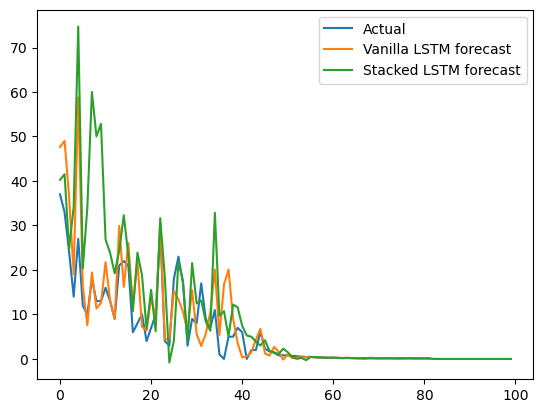

In [13]:
import matplotlib.pyplot as plt
actual=fut
vanilla=buckets1
stackedl=buckets
plt.plot(actual,label='Actual')
plt.plot(vanilla,label='Vanilla LSTM forecast')
plt.plot(stackedl,label='Stacked LSTM forecast')
plt.legend()
#display plot
plt.show()